In [1]:
#Importing libraries that are going to be used further in our notebook
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import seaborn as sns
from matplotlib import pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
# import plotly

In [122]:
# Thanks to Michael Friendly for providing the data  
df = pd.read_csv("/Users/Mansi/Documents/Florence Nightingale/nightingale.csv")

In [123]:
# Take a quick look at the data
df.head()

,Unnamed: 0,Date,Month,Year,Army,Disease,Wounds,Other,Disease.rate,Wounds.rate,Other.rate
0,1,1854-04-01,Apr,1854,8571,1,0,5,1.4,0.0,7.0
1,2,1854-05-01,May,1854,23333,12,0,9,6.2,0.0,4.6
2,3,1854-06-01,Jun,1854,28333,11,0,6,4.7,0.0,2.5
3,4,1854-07-01,Jul,1854,28722,359,0,23,150.0,0.0,9.6
4,5,1854-08-01,Aug,1854,30246,828,1,30,328.5,0.4,11.9


In [124]:
del df['Unnamed: 0'] # Deleting the redundant index column

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          24 non-null     object 
 1   Month         24 non-null     object 
 2   Year          24 non-null     int64  
 3   Army          24 non-null     int64  
 4   Disease       24 non-null     int64  
 5   Wounds        24 non-null     int64  
 6   Other         24 non-null     int64  
 7   Disease.rate  24 non-null     float64
 8   Wounds.rate   24 non-null     float64
 9   Other.rate    24 non-null     float64
dtypes: float64(3), int64(5), object(2)
memory usage: 2.0+ KB


In [126]:
# Adding new column to the dataframe defining each row of data as before sanitation improvements or after improvements
df['Period'] = ""
for i in range(len(df)):  
    if(df.iloc[i]["Year"] == 1854):
        df.at[i, 'Period'] = 'Before'
    if(df.iloc[i]["Year"] == 1856):
        df.at[i, 'Period'] = 'After'
    if(df.iloc[i]["Year"] == 1855):
        if((df.iloc[i]["Month"] == 'Jan') | (df.iloc[i]["Month"] == 'Feb') | (df.iloc[i]["Month"] == 'Mar')):
            df.at[i, 'Period'] = 'Before'
        else:
            df.at[i, 'Period'] = 'After'

In [127]:
# Creating a new column in the dataframe to represent the total deaths in each month of wartime
df['Total_Deaths'] = ""
for i in range(len(df)):
    df.at[i, 'Total_Deaths'] = df.at[i, 'Disease'] + df.at[i, 'Wounds'] + df.at[i, 'Other']

In [128]:
df

,Date,Month,Year,Army,Disease,Wounds,Other,Disease.rate,Wounds.rate,Other.rate,Period,Total_Deaths
0,1854-04-01,Apr,1854,8571,1,0,5,1.4,0.0,7.0,Before,6
1,1854-05-01,May,1854,23333,12,0,9,6.2,0.0,4.6,Before,21
2,1854-06-01,Jun,1854,28333,11,0,6,4.7,0.0,2.5,Before,17
3,1854-07-01,Jul,1854,28722,359,0,23,150.0,0.0,9.6,Before,382
4,1854-08-01,Aug,1854,30246,828,1,30,328.5,0.4,11.9,Before,859
5,1854-09-01,Sep,1854,30290,788,81,70,312.2,32.1,27.7,Before,939
6,1854-10-01,Oct,1854,30643,503,132,128,197.0,51.7,50.1,Before,763
7,1854-11-01,Nov,1854,29736,844,287,106,340.6,115.8,42.8,Before,1237
8,1854-12-01,Dec,1854,32779,1725,114,131,631.5,41.7,48.0,Before,1970
9,1855-01-01,Jan,1855,32393,2761,83,324,1022.8,30.7,120.0,Before,3168


### Attempt 1 : To create a single graph representing death rate due to diseases

In [129]:
# function to display bar values in the seaborn barplot
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

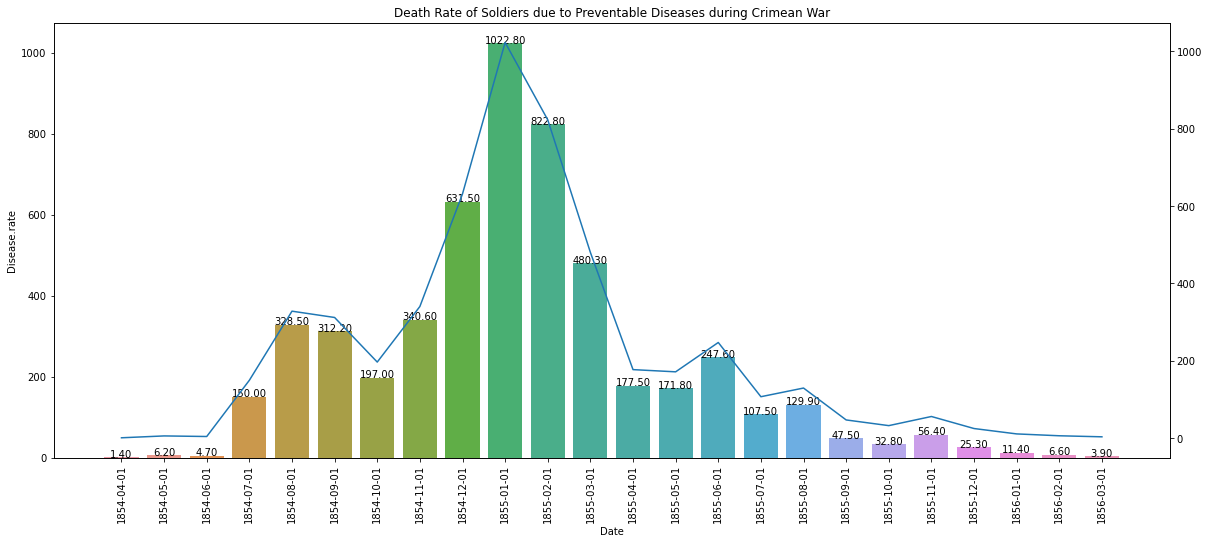

In [130]:
plt.figure(figsize=(20,8))
ax = sns.barplot(data=df, x="Date", y='Disease.rate')
plt.xticks(rotation=90)
ax.set_title('Death Rate of Soldiers due to Preventable Diseases during Crimean War')
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), df['Disease.rate'])
show_values_on_bars(ax)

### Attempt 2 : To create seperate graphs for two different periods of war

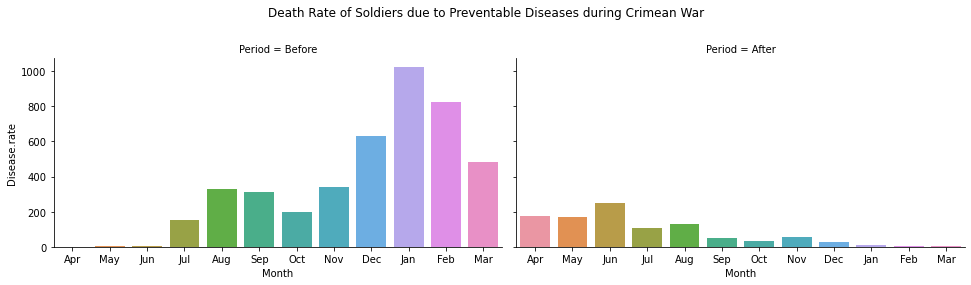

In [143]:
# Catplot to represent death rate due to diseases
ax = sns.catplot(x="Month", y="Disease.rate",
             col="Period", data=df, kind="bar",
                 height=4, aspect=1.7);
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle('Death Rate of Soldiers due to Preventable Diseases during Crimean War')
plt.show()

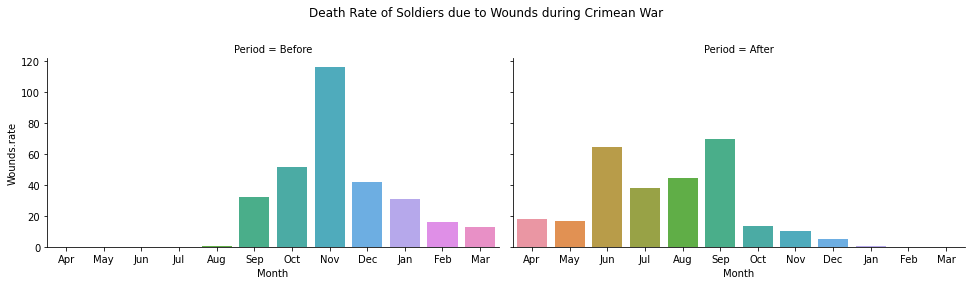

In [145]:
# Catplot to represent death rate due to Wounds
ax = sns.catplot(x="Month", y="Wounds.rate",
             col="Period", data=df, kind="bar",
                 height=4, aspect=1.7);
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle('Death Rate of Soldiers due to Wounds during Crimean War')
plt.show()

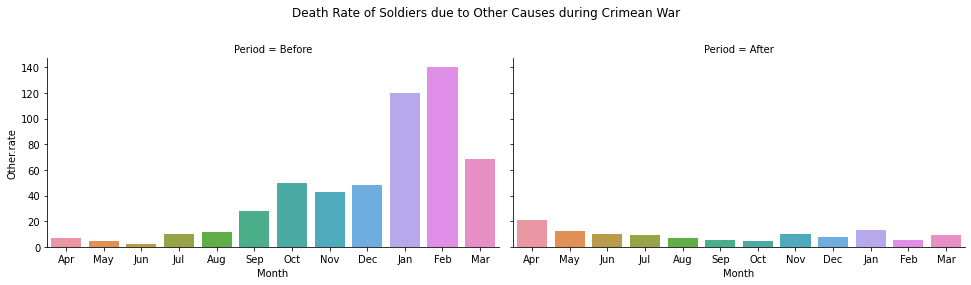

In [144]:
# Catplot to represent death rate due to other causes
ax = sns.catplot(x="Month", y="Other.rate",
             col="Period", data=df, kind="bar",
                 height=4, aspect=1.7);
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle('Death Rate of Soldiers due to Other Causes during Crimean War')
plt.show()

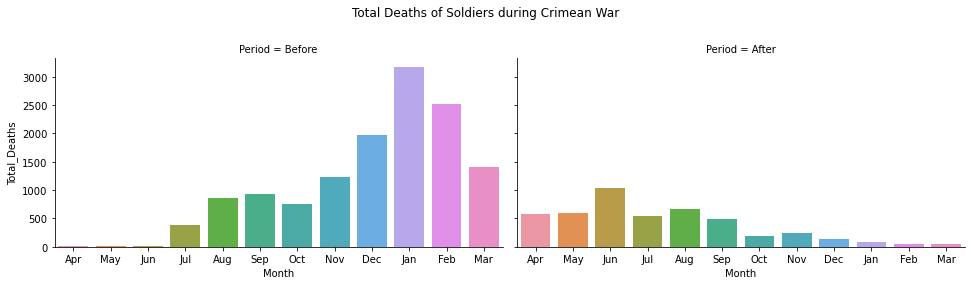

In [147]:
# Catplot to represent total deaths over the two years
ax = sns.catplot(x="Month", y="Total_Deaths",
             col="Period", data=df, kind="bar",
                 height=4, aspect=1.7);
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle('Total Deaths of Soldiers during Crimean War')
plt.show()

### Attempt 3 : An attempt to represent complete information in one graph

In [135]:
wide_df = px.data.medals_wide()
fig = px.bar(df, x="Date", y=["Disease.rate", "Wounds.rate", "Other.rate"], title="Soldiers Deaths(per 1000) and their Causes in the Crimean War")
fig.update_layout(legend_title_text='Causes', yaxis_title="Deat Rate")
fig.show()

### Attempt 4 : To represent death rates due to all causes in two graphs for two years

In [157]:
# Defining data to be used in Plotly graphs in following attempts
trace1 = go.Bar(x=df[df['Period']=='Before']['Date'], y=df[df['Period']=='Before']['Disease.rate'], name='Diseases (Before)')
trace2 = go.Bar(x=df[df['Period']=='Before']['Date'], y=df[df['Period']=='Before']['Wounds.rate'], name='Wounds (Before)')
trace3 = go.Bar(x=df[df['Period']=='Before']['Date'], y=df[df['Period']=='Before']['Other.rate'], name='Other (Before)')
trace4 = go.Bar(x=df[df['Period']=='After']['Date'], y=df[df['Period']=='After']['Disease.rate'], name='Diseases (After)')
trace5 = go.Bar(x=df[df['Period']=='After']['Date'], y=df[df['Period']=='After']['Wounds.rate'], name='Wounds (After)')
trace6 = go.Bar(x=df[df['Period']=='After']['Date'], y=df[df['Period']=='After']['Other.rate'], name='Other (After)')

127.0.0.1 - - [22/May/2021 23:50:27] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:50:27] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:50:27] "GET /_dash-layout HTTP/1.1" 200 -


In [149]:
# Using Dash framework to build the chart

app = JupyterDash(__name__)

app.layout = html.Div(
    children=[
        html.H2(
            children="Soldiers Deaths Before Improvements",
            style={"color": "#00361c", "text-align": "center"},
        ),
        dcc.Graph(
            id="Before",
            style={"width": "95%", "height": "45vh"},
            # style={"width":500, "margin": 0,'display': 'inline-block'},
            figure={
                "data": [trace1, trace2, trace3],
                "layout": go.Layout(barmode="stack"),
            },
        ),
        html.Div(
            children=[
                html.H2(
                    children="Soldiers Deaths After Improvements",
                    style={"color": "#00361c", "text-align": "center"},
                ),
                dcc.Graph(
                    id="After",
                    style={"width": "95%", "height": "45vh"},
                    # style={"width":500, "margin": 0,'display': 'inline-block'},
                    figure={
                        "data": [trace4, trace5, trace6],
                        "layout": go.Layout(barmode="stack"),
                    },
                ),
            ],
            style={"width": "100%", "display": "inline-block"},
        ),
    ],
    style={"width": "100%", "display": "inline-block"},
)

app.run_server(mode="inline", host="0.0.0.0", port=8000, debug=False)

# Try one of the following host/ports if above combination gives error
# app.run_server(mode="inline", host="0.0.0.0", port=8080, debug=False)
# app.run_server(mode="inline", host="0.0.0.0", port=8050, debug=False)

127.0.0.1 - - [22/May/2021 23:39:21] "GET /_shutdown_b1cf246b-ae45-42f2-aa51-5283e391aa69 HTTP/1.1" 200 -
 * Running on http://0.0.0.0:8000/ (Press CTRL+C to quit)
127.0.0.1 - - [22/May/2021 23:39:22] "GET /_alive_b1cf246b-ae45-42f2-aa51-5283e391aa69 HTTP/1.1" 200 -


127.0.0.1 - - [22/May/2021 23:39:22] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:39:22] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:39:22] "GET /_dash-layout HTTP/1.1" 200 -


### Attempt 5 : To combine the graphs of previous attempt

In [154]:
# Using Dash framework to build the chart

app = JupyterDash(__name__)

app.layout = html.Div(
    children=[
        html.H2(
            children="Soldiers Deaths(per 1000) and Causes in the Crimean War",
            style={"color": "#4863A0", "text-align": "center"},
        ),
        html.H4(
            children="How basic sanitization saved lives of soldiers",
            style={"color": "#737CA1", "text-align": "center"},
        ),
        html.P(
            "Improving sanitation conditions in army hospitals in the middle of Crimean War (April 1855) reduced the deaths of soldiers from infectious diseases, with death rates dropping from 42% to 2%."
        ),
        dcc.Graph(
            id="Before",
            style={"width": "95%", "height": "90vh"},
            # style={"width":500, "margin": 0,'display': 'inline-block'},
            figure={
                "data": [trace1, trace2, trace3, trace4, trace5, trace6],
                "layout": go.Layout(
                    barmode="stack",
                    annotations=[
                        dict(
                            x=1.1,
                            y=1.05,
                            align="right",
                            valign="top",
                            text="Causes of Deaths",
                            showarrow=False,
                            xref="paper",
                            yref="paper",
                            xanchor="center",
                            yanchor="top",
                        )
                    ],
                ),
            },
        ),
    ],
    style={"width": "100%", "display": "inline-block"},
)

app.run_server(mode="inline", host="0.0.0.0", port=8000, debug=False)

# Try one of the following host/ports if above combination gives error

# app.run_server(mode="inline", host="0.0.0.0", port=8080, debug=False)
# app.run_server(mode="inline", host="0.0.0.0", port=8050, debug=False)

127.0.0.1 - - [22/May/2021 23:44:23] "GET /_shutdown_b1cf246b-ae45-42f2-aa51-5283e391aa69 HTTP/1.1" 200 -
 * Running on http://0.0.0.0:8000/ (Press CTRL+C to quit)
127.0.0.1 - - [22/May/2021 23:44:23] "GET /_alive_b1cf246b-ae45-42f2-aa51-5283e391aa69 HTTP/1.1" 200 -


127.0.0.1 - - [22/May/2021 23:44:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:44:23] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:44:23] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:44:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:44:38] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:44:38] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:45:34] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:45:35] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:45:35] "GET /_dash-dependencies HTTP/1.1" 200 -


### Attempt 6 : Change text font colors, size and position

In [155]:
# Using Dash framework to build the chart

app = JupyterDash(__name__)

app.layout = html.Div(
    children=[
        html.H2(
            children="Soldiers Deaths(per 1000) and Causes in the Crimean War",
            style={"color": "#E55451", "text-align": "left"},
        ),
        html.H3(
            children="Basic sanitization improvements saved thousands of lives",
            style={"color": "#837E7C", "text-align": "left"},
        ),
        html.P(
            "Improving sanitation conditions in army hospitals in the middle of Crimean War (April 1855) reduced the deaths of soldiers from infectious diseases, with death rates dropping from 42% to 2%."
        ),
        dcc.Graph(
            id="Before",
            style={"width": "95%", "height": "90vh"},
            # style={"width":500, "margin": 0,'display': 'inline-block'},
            figure={
                "data": [trace1, trace2, trace3, trace4, trace5, trace6],
                "layout": go.Layout(
                    barmode="stack",
                    annotations=[
                        dict(
                            x=1.1,
                            y=1.05,
                            align="right",
                            valign="top",
                            text="Causes of Deaths",
                            showarrow=False,
                            xref="paper",
                            yref="paper",
                            xanchor="center",
                            yanchor="top",
                        )
                    ],
                ),
            },
        ),
    ],
    style={"width": "100%", "display": "inline-block"},
)

app.run_server(mode="inline", host="0.0.0.0", port=8000, debug=False)

# Try one of the following host/ports if above combination gives error

# app.run_server(mode="inline", host="0.0.0.0", port=8080, debug=False)
# app.run_server(mode="inline", host="0.0.0.0", port=8050, debug=False)


127.0.0.1 - - [22/May/2021 23:45:41] "GET /_shutdown_b1cf246b-ae45-42f2-aa51-5283e391aa69 HTTP/1.1" 200 -
 * Running on http://0.0.0.0:8000/ (Press CTRL+C to quit)
127.0.0.1 - - [22/May/2021 23:45:42] "GET /_alive_b1cf246b-ae45-42f2-aa51-5283e391aa69 HTTP/1.1" 200 -


127.0.0.1 - - [22/May/2021 23:45:42] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:45:43] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:45:43] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:45:44] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:45:44] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:45:44] "GET /_dash-dependencies HTTP/1.1" 200 -


### Attempt 7 : Add a line seperator in the graph to divide the two periods of sanitation conditions

In [152]:
app = JupyterDash(__name__)

app.layout = html.Div(
    children=[
        html.H2(
            children="Soldiers Deaths(per 1000) and Causes in the Crimean War",
            style={"color": "#E55451", "text-align": "left"},
        ),
        html.H3(
            children="Basic sanitization improvements saved thousands of lives",
            style={"color": "#837E7C", "text-align": "left"},
        ),
        html.P(
            "Improving sanitation conditions in army hospitals in the middle of Crimean War (April 1855) reduced the deaths of soldiers from infectious diseases, with death rates dropping from 42% to 2%."
        ),
        dcc.Graph(
            id="Before",
            style={"width": "95%", "height": "90vh"},
            # style={"width":500, "margin": 0,'display': 'inline-block'},
            figure={
                "data": [trace1, trace2, trace3, trace4, trace5, trace6],
                "layout": go.Layout(
                    barmode="stack",
                    annotations=[
                        dict(
                            x=1.1,
                            y=1.05,
                            align="right",
                            valign="top",
                            text="Causes of Deaths",
                            showarrow=False,
                            xref="paper",
                            yref="paper",
                            xanchor="center",
                            yanchor="top",
                            font_size=17,
                            font_color="Crimson",
                        ),
                        dict(
                            x=0.85,
                            y=0.7,
                            text="After Improvements in Sanitation",
                            font_size=15,
                            font_color="Crimson",
                            showarrow=False,
                            arrowhead=1,
                            xref="paper",
                            yref="paper",
                        ),
                        dict(
                            x=0.05,
                            y=0.7,
                            text="Before Improvements in Sanitation",
                            font_size=15,
                            font_color="Crimson",
                            showarrow=False,
                            arrowhead=1,
                            xref="paper",
                            yref="paper",
                        )
                    ],
                    shapes=[
                        dict(
                            type="line",
                            x0=0.5,
                            y0=0.9,
                            x1=0.5,
                            y1=0,
                            xref="paper",
                            yref="paper",
                            line=dict(
                                color="Grey",
                                width=3,
                                dash="dashdot",
                            ),
                        )
                    ],
                ),
            },
        ),
    ],
    style={"width": "100%", "display": "inline-block"},
)

app.run_server(mode="inline", host="0.0.0.0", port=8000, debug=False)

# Try one of the following host/ports if above combination gives error

# app.run_server(mode="inline", host="0.0.0.0", port=8080, debug=False)
# app.run_server(mode="inline", host="0.0.0.0", port=8050, debug=False)

127.0.0.1 - - [22/May/2021 23:43:08] "GET /_shutdown_b1cf246b-ae45-42f2-aa51-5283e391aa69 HTTP/1.1" 200 -
 * Running on http://0.0.0.0:8000/ (Press CTRL+C to quit)
127.0.0.1 - - [22/May/2021 23:43:09] "GET /_alive_b1cf246b-ae45-42f2-aa51-5283e391aa69 HTTP/1.1" 200 -


127.0.0.1 - - [22/May/2021 23:43:09] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:43:09] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:43:09] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:43:28] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:43:28] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:43:28] "GET /_dash-layout HTTP/1.1" 200 -


### Attempt 7 : Add text for before - after periods and total deaths in each period

In [156]:
app = JupyterDash(__name__)

app.layout = html.Div(
    children=[
        html.H2(
            children="Soldiers Deaths(per 1000) and Causes in the Crimean War",
            style={"color": "#E55451", "text-align": "left"},
        ),
        html.H3(
            children="Basic sanitization improvements saved thousands of lives",
            style={"color": "#837E7C", "text-align": "left"},
        ),
        html.P(
            "Improving sanitation conditions in army hospitals in the middle of Crimean War (April 1855) reduced the deaths of soldiers from infectious diseases, with death rates dropping from 42% to 2%."
        ),
        dcc.Graph(
            id="Before",
            style={"width": "95%", "height": "90vh"},
            # style={"width":500, "margin": 0,'display': 'inline-block'},
            figure={
                "data": [trace1, trace2, trace3, trace4, trace5, trace6],
                "layout": go.Layout(
                    barmode="stack",
                    annotations=[
                        dict(
                            x=1.1,
                            y=1.05,
                            align="right",
                            valign="top",
                            text="Causes of Deaths",
                            showarrow=False,
                            xref="paper",
                            yref="paper",
                            xanchor="center",
                            yanchor="top",
                            font_size=16,
                            font_color="Crimson",
                        ),
                        dict(
                            x=0.85,
                            y=0.94,
                            text="After Improvements in Sanitation",
                            font_size=15,
                            font_color="MediumPurple",
                            showarrow=False,
                            arrowhead=1,
                            xref="paper",
                            yref="paper",
                        ),
                        dict(
                            x=0.03,
                            y=0.94,
                            text="Before Improvements in Sanitation",
                            font_size=15,
                            font_color="MediumPurple",
                            showarrow=False,
                            arrowhead=1,
                            xref="paper",
                            yref="paper",
                        ),
                        dict(
                            x=0.067,
                            y=0.89,
                            text="Deaths due to Preventable Diseases",
                            font_size=14.5,
                            font_color="Grey",
                            showarrow=False,
                            arrowhead=1,
                            xref="paper",
                            yref="paper",
                        ),
                        dict(
                            x=0.005,
                            y=0.89,
                            text="11157",
                            font_size=16,
                            font_color="Crimson",
                            showarrow=False,
                            arrowhead=1,
                            xref="paper",
                            yref="paper",
                        ),
                        dict(
                            x=0.55,
                            y=0.89,
                            text="3319",
                            font_size=16,
                            font_color="Crimson",
                            showarrow=False,
                            arrowhead=1,
                            xref="paper",
                            yref="paper",
                        ),
                        dict(
                            x=0.885,
                            y=0.89,
                            text="Deaths due to Preventable Diseases",
                            font_size=14.5,
                            font_color="Grey",
                            showarrow=False,
                            arrowhead=1,
                            xref="paper",
                            yref="paper",
                        ),
                    ],
                    shapes=[
                        dict(
                            type="line",
                            x0=0.5,
                            y0=0.95,
                            x1=0.5,
                            y1=0,
                            xref="paper",
                            yref="paper",
                            line=dict(
                                color="Grey",
                                width=3,
                                dash="dashdot",
                            ),
                        )
                    ],
                ),
            },
        ),
    ],
    style={"width": "100%", "display": "inline-block"},
)


app.run_server(mode="inline", host="0.0.0.0", port=8000, debug=False)

# Try one of the following host/ports if above combination gives error

# app.run_server(mode="inline", host="0.0.0.0", port=8080, debug=False)
# app.run_server(mode="inline", host="0.0.0.0", port=8050, debug=False)

127.0.0.1 - - [22/May/2021 23:47:43] "GET /_shutdown_b1cf246b-ae45-42f2-aa51-5283e391aa69 HTTP/1.1" 200 -
 * Running on http://0.0.0.0:8000/ (Press CTRL+C to quit)
127.0.0.1 - - [22/May/2021 23:47:43] "GET /_alive_b1cf246b-ae45-42f2-aa51-5283e391aa69 HTTP/1.1" 200 -


127.0.0.1 - - [22/May/2021 23:47:43] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:47:43] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:47:43] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:47:46] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:47:46] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 23:47:46] "GET /_dash-layout HTTP/1.1" 200 -


### END